In [1]:
#Import required libraries
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn import preprocessing
from __future__ import print_function
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn import mixture
from sklearn.linear_model import LogisticRegression
import sklearn as sk
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import random
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Loading Data
Demographic = pd.read_csv("data/Demographic.csv")
Clean_Demographic = pd.read_csv("data/Clean_Demographic.csv")
WClean_Demographic = pd.read_csv("data/WClean_Demographic.csv")

In [3]:
# Post processing of Data
Clean_Demographic["HOUSING"]  = Clean_Demographic["HOUSING"].replace({'NAN': 'unknown' })
Clean_Demographic["EDUCATION"]  = Clean_Demographic["EDUCATION"].replace({'Secondary school': 'School',
    'Primary school': 'School', 'High school': 'School', 'Middle school': 'School','NAN': 'unknown' })
Clean_Demographic["JOB_TYPE"]  = Clean_Demographic["JOB_TYPE"].replace({'unemployed': 'Unemployed', 'NAN':'unknown' })

WClean_Demographic["HOUSING"]  = WClean_Demographic["HOUSING"].replace({'NAN': 'unknown' })
WClean_Demographic["EDUCATION"]  = WClean_Demographic["EDUCATION"].replace({'Secondary school': 'School', 
    'Primary school': 'School', 'High school': 'School', 'Middle school': 'School','NAN': 'unknown' })
WClean_Demographic["JOB_TYPE"]  = WClean_Demographic["JOB_TYPE"].replace({'unemployed': 'Unemployed', 'NAN':'unknown' })

In [4]:
# Make the data vlaues numerical
columns = ['ACCOUNT_TYPE','GENDER', 'MARITAL_STATUS', 'EDUCATION', 'JOB_TYPE', 'HOUSING', 'LOAN']

Clean_Demographic_num = Clean_Demographic 
Clean_Demographic_num[columns] = Clean_Demographic_num[columns].apply(lambda col: pd.factorize(col, sort=False)[0])

WClean_Demographic_num = WClean_Demographic 
WClean_Demographic_num[columns] = WClean_Demographic_num[columns].apply(lambda col: pd.factorize(col, sort=False)[0])

In [5]:
# Normalizing each column (feature values) of data
min_max_scaler = preprocessing.MinMaxScaler()
for i in range(1,10): # "ACCOUNT_TYPE" to "LOAN" columns
    Clean_Demographic_num.iloc[:,i] = pd.DataFrame(min_max_scaler.fit_transform(Clean_Demographic_num.iloc[:,i].values.reshape(-1, 1)))
    WClean_Demographic_num.iloc[:,i] = pd.DataFrame(min_max_scaler.fit_transform(WClean_Demographic_num.iloc[:,i].values.reshape(-1, 1)))

In [6]:
# Classification
# Diving data to its values and labels
X = WClean_Demographic_num.iloc[:, 1:10].values
X0 = WClean_Demographic_num[WClean_Demographic_num['default payment in Jan 2022'] == 0].iloc[:, 1:10].values
X1 = WClean_Demographic_num[WClean_Demographic_num['default payment in Jan 2022'] == 1].iloc[:, 1:10].values

y= WClean_Demographic_num.iloc[:, -1].values
y0 =  WClean_Demographic_num[WClean_Demographic_num['default payment in Jan 2022'] == 0].iloc[:, -1].values
y1 =  WClean_Demographic_num[WClean_Demographic_num['default payment in Jan 2022'] == 1].iloc[:, -1].values

In [7]:
#Spliting data to train and test sets
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1)

In [8]:
C0_trs = len(y0_train) # class 0 train size
C0_tes = len(y0_test)  # class 0 test size

C1_trs = len(y1_train) # class 1 train size
C1_tes = len(y1_test)  # class 1 test size

#Shuffle class 0 
train_ri0 = np.random.choice(C0_trs, size=C1_trs, replace=False) #Class 0 Train random_indices
test_ri0 = np.random.choice(C0_tes, size=C1_tes, replace=False) #Class 0 Test random_indices

#Making balanced training set
X_train = np.concatenate((X0_train[train_ri0,:],X1_train), axis=0)
y_train = np.concatenate((y0_train[train_ri0],y1_train), axis=0)

#Making balanced test set
X_test = np.concatenate((X0_test[test_ri0,:],X1_test), axis=0)
y_test = np.concatenate((y0_test[test_ri0],y1_test), axis=0)

In [9]:
# Support Vector Machine
#Defining SVM kernel ()
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

model = SVC(kernel = kernels[2]) #RBF kernel
#Training the model
model.fit(X_train, y_train)

#Testing the model
y_pred = model.predict(X_test)

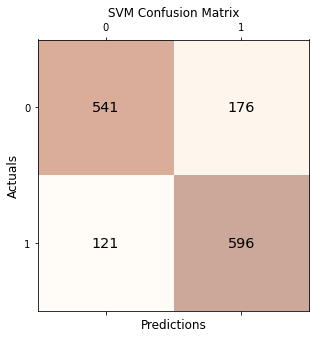

SVM:

               precision    recall  f1-score   support

           0       0.82      0.75      0.78       717
           1       0.77      0.83      0.80       717

    accuracy                           0.79      1434
   macro avg       0.79      0.79      0.79      1434
weighted avg       0.79      0.79      0.79      1434



In [10]:
#Calculating and ploting the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('SVM Confusion Matrix', fontsize=12)
plt.show()

#Reporting the results
Precision = precision_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
F1_score = f1_score(y_test, y_pred)
Accuracy = accuracy_score(y_test, y_pred)
print('SVM:\n\n',classification_report(y_test,y_pred))

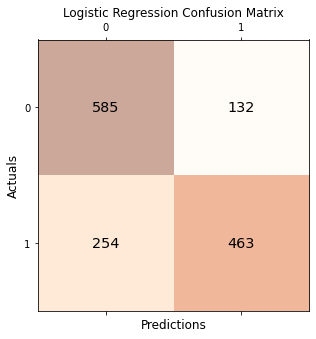

LOGISTIC Regression:

               precision    recall  f1-score   support

           0       0.70      0.82      0.75       717
           1       0.78      0.65      0.71       717

    accuracy                           0.73      1434
   macro avg       0.74      0.73      0.73      1434
weighted avg       0.74      0.73      0.73      1434



In [11]:
# LOGISTIC Regression
LR = LogisticRegression(random_state=0, solver='liblinear', multi_class='ovr').fit(X_train, y_train)
# solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], default='lbfgs'
y_pred = LR.predict(X_test)

#Calculating and ploting the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Logistic Regression Confusion Matrix', fontsize=12)
plt.show()

#Reporting the results
print('LOGISTIC Regression:\n\n',classification_report(y_test,y_pred))

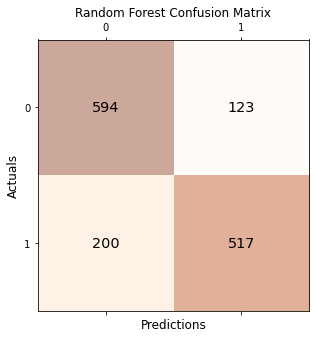

Random Forest:

               precision    recall  f1-score   support

           0       0.75      0.83      0.79       717
           1       0.81      0.72      0.76       717

    accuracy                           0.77      1434
   macro avg       0.78      0.77      0.77      1434
weighted avg       0.78      0.77      0.77      1434



In [12]:
# Random Forest
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

#Reporting the results
#Calculating and ploting the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Random Forest Confusion Matrix', fontsize=12)
plt.show()
print('Random Forest:\n\n',classification_report(y_test,y_pred))

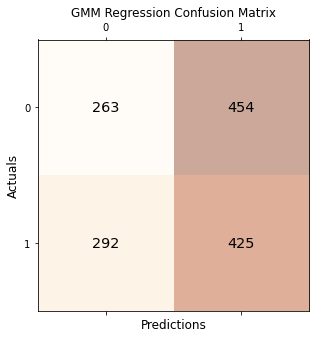

GMM Results:

               precision    recall  f1-score   support

           0       0.47      0.37      0.41       717
           1       0.48      0.59      0.53       717

    accuracy                           0.48      1434
   macro avg       0.48      0.48      0.47      1434
weighted avg       0.48      0.48      0.47      1434



In [13]:
#GMM
gmm_model = mixture.GaussianMixture(n_components=2, covariance_type='diag') #['spherical', 'diag', 'tied', 'full']
gmm_model.fit(X_train)
y_pred = gmm_model.predict(X_test)

#Reporting the results
#Calculating and ploting the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('GMM Regression Confusion Matrix', fontsize=12)
plt.show()

print('GMM Results:\n\n',classification_report(y_test,y_pred))

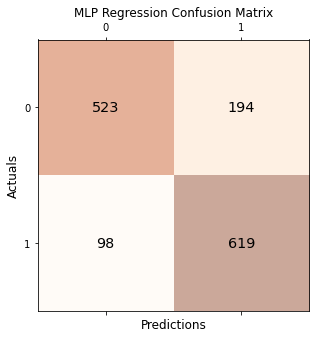

MLP Results:

               precision    recall  f1-score   support

           0       0.84      0.73      0.78       717
           1       0.76      0.86      0.81       717

    accuracy                           0.80      1434
   macro avg       0.80      0.80      0.80      1434
weighted avg       0.80      0.80      0.80      1434



In [14]:
# Multi Layer Perceptron (MLP)
NN = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(15, 2), activation='relu', random_state=1, batch_size= 16, max_iter =10000)
#solver = ['lbfgs', 'sgd', 'adam'], default='adam'
#activation = ['identity', 'logistic', 'tanh', 'relu'], default=’relu’
NN.fit(X_train, y_train)
y_pred = NN.predict(X_test)

#Reporting the results
#Calculating and ploting the confusion matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('MLP Regression Confusion Matrix', fontsize=12)
plt.show()

print('MLP Results:\n\n',classification_report(y_test,y_pred))